In [1]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

Data: Sensors: 128 data: 2232, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']
503 data of 1588 not shown
Could not set x/y label:  1588 [12.0,...,56.0] 1588 [15.0,...,63.0]
Data: Sensors: 128 data: 2008, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']
371 data of 1368 not shown
Could not set x/y label:  1368 [12.0,...,56.0] 1368 [15.0,...,63.0]


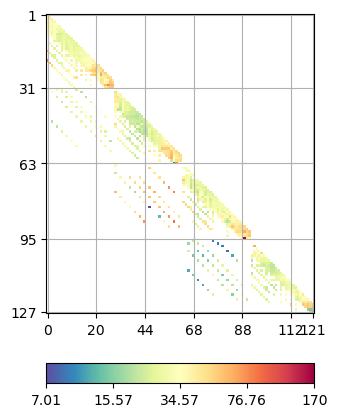

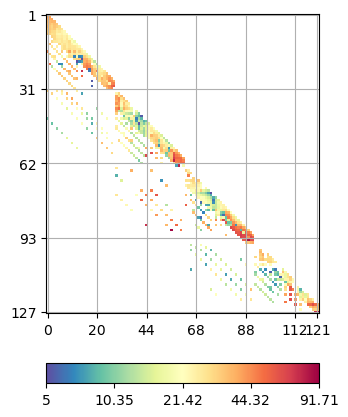

In [2]:
data0 = ert.load("HXB_E6789_R3.ohm")
data1 = ert.load("HXB_E6789_R4.ohm")
# ratioData = data0.copy()
# ratioData["rhoa"] = data1["r"] / data0["r"]
for data in [data0, data1]:
    print(data)
    data.ensure2D()
    data["k"] = ert.geometricFactors(data, dim=2)
    data["rhoa"] = data["r"] * data["k"]
    data.remove(pg.abs(data["k"]) > 500)
    data.remove(data["rhoa"] <= 5)
    data.remove(data["rhoa"] > 500)
    pg.viewer.mpl.showDataContainerAsMatrix(
        data, "a", "m", "rhoa", cMap="Spectral_r", logScale=True,
        )


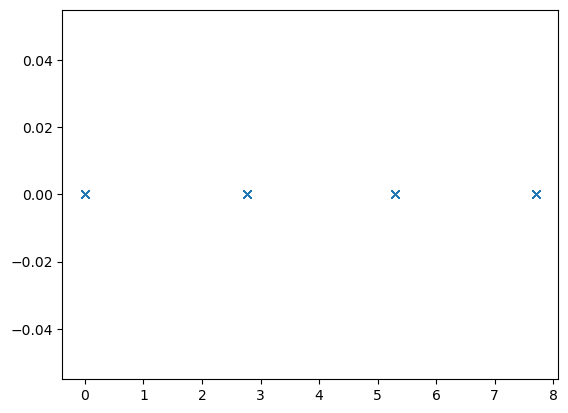

In [3]:
pg.plt.plot(pg.x(data0), pg.z(data0), "x")

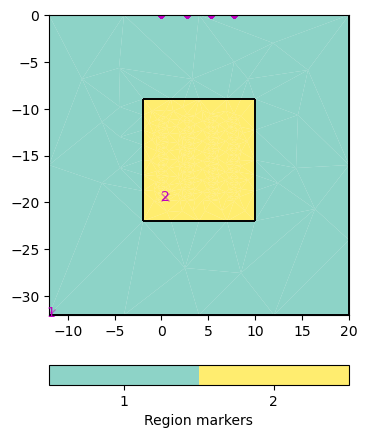

In [4]:
world = mt.createWorld(start=[-12, -32], end=[20, 0])
inner = mt.createRectangle(start=[-2, -22], end=[10, -9], marker=2)
geo = world + inner
for sensor in data0.sensors():
    geo.createNode(sensor)

ax, cb = pg.show(geo)
ax.plot(pg.x(data0), pg.z(data0), "m.")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20429279760>)

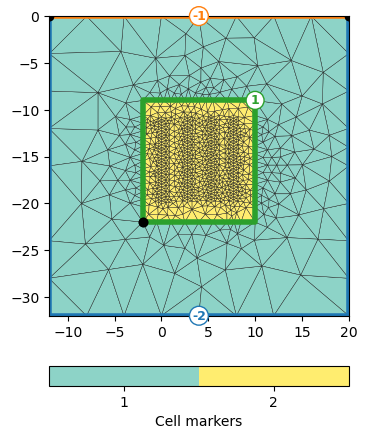

In [5]:
mesh = mt.createMesh(geo)
pg.show(mesh, markers=True, showMesh=True)

In [6]:
data0["err"] = ert.estimateError(data0)
mgr = ert.Manager(data0)
mgr.invert(mesh=mesh, robustData=True, verbose=True)


08/06/23 - 12:06:17 - pyGIMLi - INFO - Found 2 regions.
08/06/23 - 12:06:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/06/23 - 12:06:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/06/23 - 12:06:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/06/23 - 12:06:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3798 Cells: 7532 Boundaries: 5680
08/06/23 - 12:06:17 - pyGIMLi - INFO - Use median(data values)=29.770129395850635
08/06/23 - 12:06:17 - pyGIMLi - INFO - Created startmodel from forward operator: 1531 [29.770129395850635,...,29.770129395850635]
08/06/23 - 12:06:17 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000204291E3630>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000204291E3720>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000204291E36D0>
min/max (data): 7.01/170
min/max (error): 3%/3.01%
min/max (start model): 29.77/29.77
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 16.55 (dPhi = 84.05%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3.4 (dPhi = 53.0%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.35 (dPhi = 3.76%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.83 (dPhi = -13.14%) lam: 20.0


#######################################################

1531 [70.91025707674666,...,36.005214324156185]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2042a4c3670>)

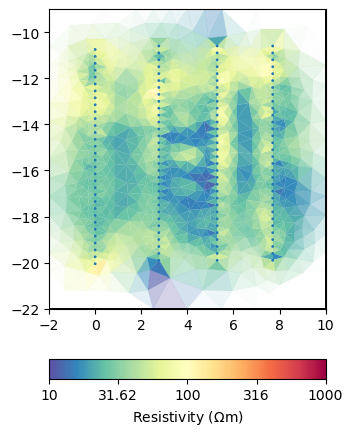

In [7]:
mgr.showResult(cMin=10, cMax=1000)

In [8]:
data1["err"] = ert.estimateError(data1)
# data1["rhoa"] = data1["r"] * data1["k"] * mgr.inv.response / data0["rhoa"]
mgr1 = ert.Manager(data1)
mgr1.invert(mesh=mesh, robustData=True, 
            startModel=mgr.model, isReference=True, verbose=True)

08/06/23 - 12:06:33 - pyGIMLi - INFO - Found 2 regions.
08/06/23 - 12:06:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/06/23 - 12:06:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/06/23 - 12:06:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/06/23 - 12:06:33 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3798 Cells: 7532 Boundaries: 5680
08/06/23 - 12:06:33 - pyGIMLi - INFO - Starting inversion.
08/06/23 - 12:06:33 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002043F437720>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002043F437860>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002043F4377C0>
min/max (data): 5/102
min/max (error): 3%/3.02%
min/max (start model): 9.25/127
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 42.54 (dPhi = 84.87%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 8.99 (dPhi = 55.9%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 4.26 (dPhi = 12.59%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.77 (dPhi = -7.26%) lam: 20.0
##############################################################

1531 [74.44887808414302,...,31.199020572733023]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2043f425dc0>)

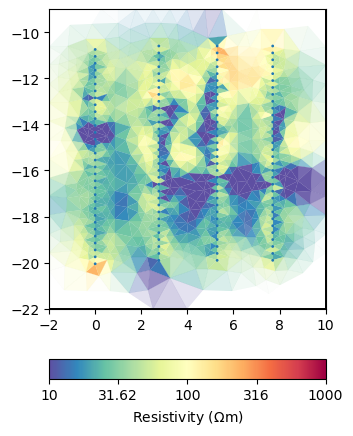

In [9]:
mgr1.showResult(cMin=10, cMax=1000)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2043f2043a0>)

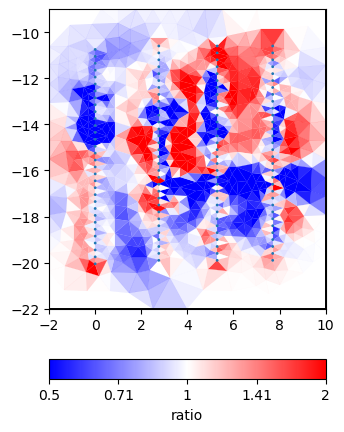

In [10]:
mgr1.showResult(mgr1.model/mgr.model, label="ratio",
                cMin=0.5, cMax=2, cMap="bwr")

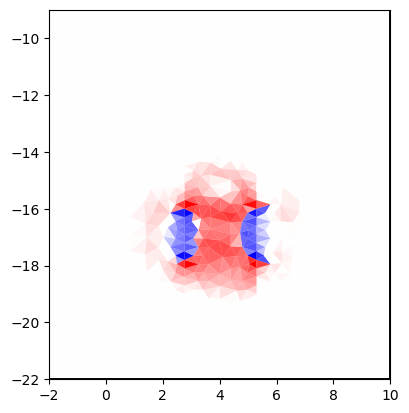

In [11]:
# mgr.fop.createJacobian(pg.Vector(mgr.paraDomain.cellCount(), 10.0))
sens = mgr.fop.jacobian()[111]
normsens = pg.utils.logDropTol(sens/mgr.paraDomain.cellSizes(), 1e-2)
normsens /= max(normsens)
ax, cb = pg.show(mgr.paraDomain, normsens, cMap="bwr", colorBar=False,
                label="sensitivity", nLevs=3, cMin=-1, cMax=1)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20452362b50>)

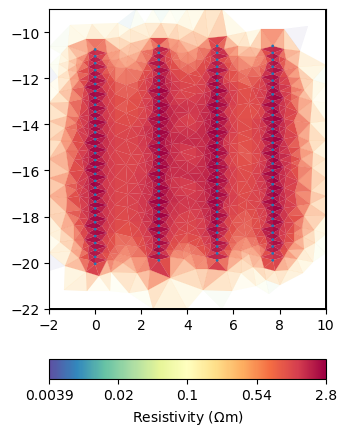

In [12]:
mgr.showResult(mgr.coverage())